## Hierarquical Clustering Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

import scipy.cluster.hierarchy as sc

%matplotlib inline

## 1. Loading dataset

In [2]:
# Import IRIS dataset
iris = datasets.load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 2. Preprocessing

In [3]:
# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris_data)
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [4]:
# Applying PCA
pca = PCA(n_components=2, random_state=42)
pca_scaled = pca.fit_transform(X_scaled)

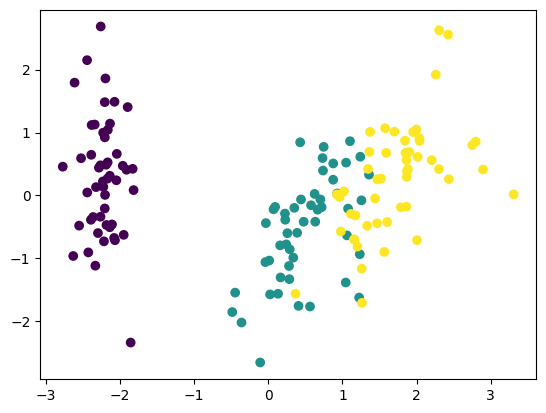

In [5]:
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1], c=iris.target)
plt.show()

## 3. Agglomerative Clustering

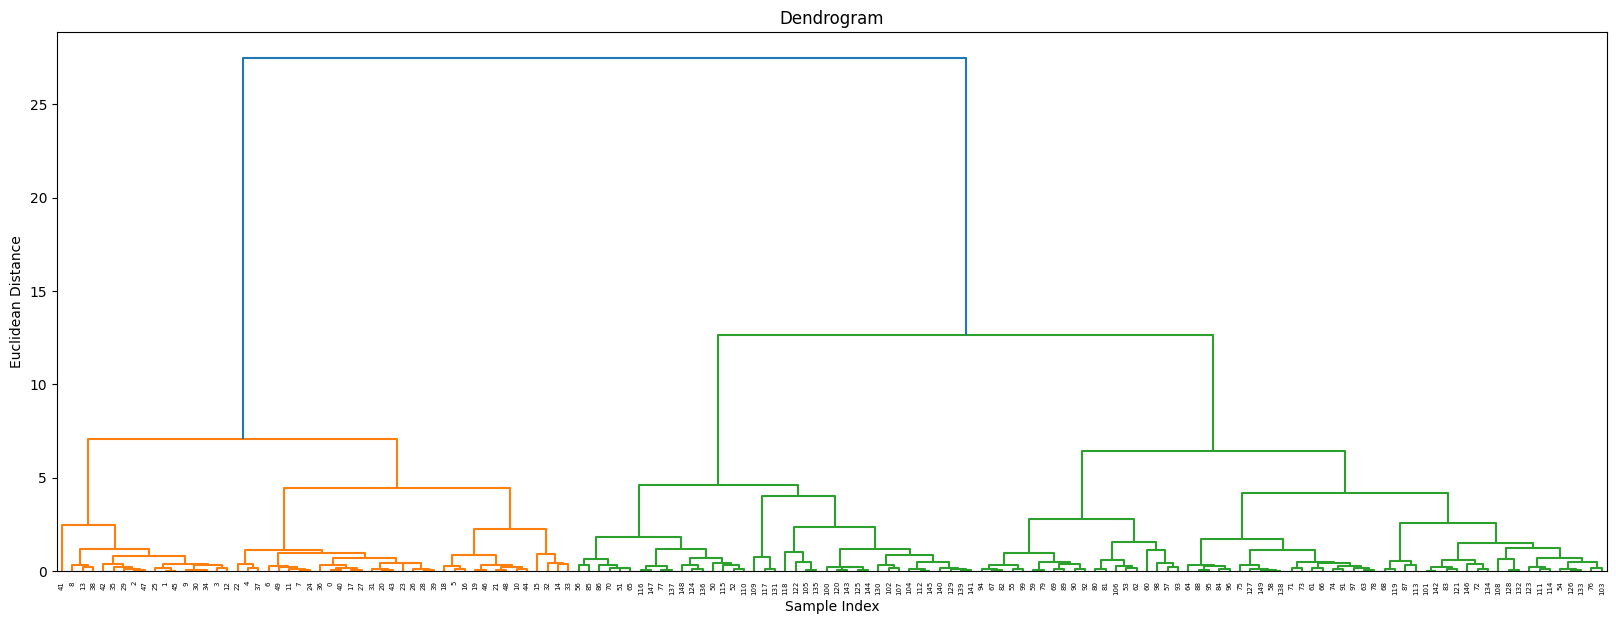

In [6]:
# Constructing a Dendrogram
## Plot the Dendrogram
plt.figure(figsize=(20, 7))
plt.title("Dendrogram")

## Creating Dendrogram
sc.dendrogram(sc.linkage(pca_scaled, method='ward'))
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.show()

In [9]:
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [10]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

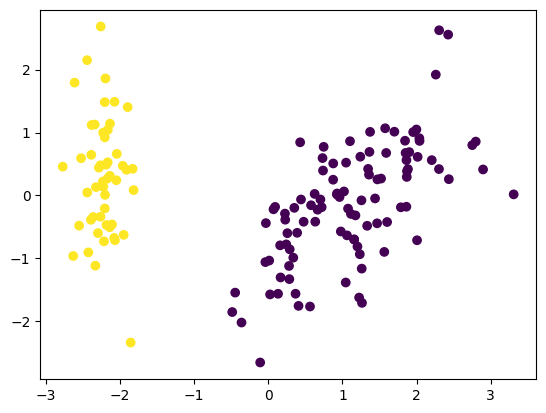

In [12]:
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1], c = cluster.labels_)
plt.show()

## 4. Silhouette Score

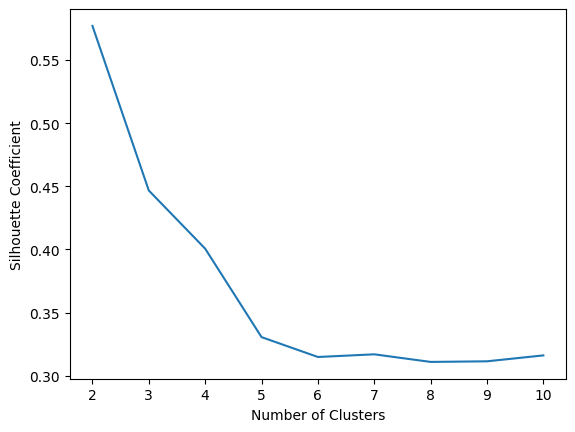

In [13]:
silhouette_coefficients = []

# start at 2 clusters for Silhouette Coefficient
for k in range(2, 11):
    agg = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    agg.fit(X_scaled)
    score = silhouette_score(X_scaled, agg.labels_)
    silhouette_coefficients.append(score)

# plotting silhouette score
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()